In [2]:
%matplotlib inline

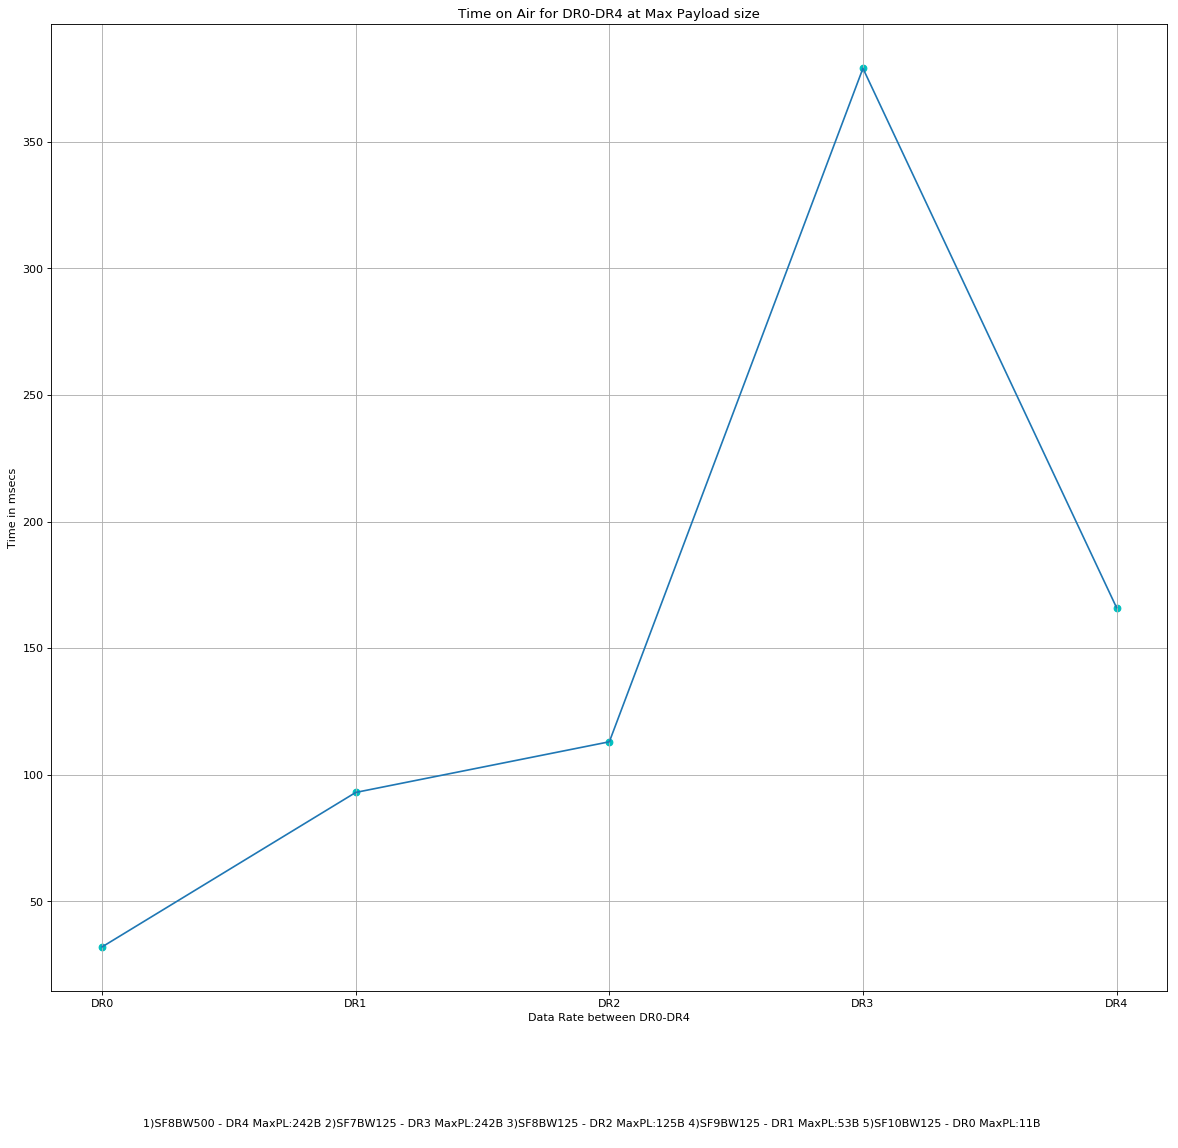

In [3]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import re
import time, datetime


def plot():
	"""
	if os.path.exists(file):
		print("file:%s found\n"%file)
	else:
		print("File:%s not found\n"%file)
		return -1
	"""
	toaArr = [32,93,113,379,166]
	toaArr = np.array(toaArr)

	dataRate = ['DR0','DR1','DR2','DR3','DR4']
	dataRate = np.array(dataRate)

	fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
	plt.scatter(dataRate,toaArr,color='c')
	plt.plot(dataRate,toaArr)
	text_str = '1)SF8BW500 - DR4 MaxPL:242B 2)SF7BW125 - DR3 MaxPL:242B 3)SF8BW125 - DR2 MaxPL:125B 4)SF9BW125 - DR1 MaxPL:53B 5)SF10BW125 - DR0 MaxPL:11B\n'
	fig.text(.5,0.01,text_str,wrap=True,ha='center')

if __name__ == '__main__':
	#filePath = ['/home/hadigal/Desktop/log_mqttPub.txt','/home/hadigal/Desktop/log_mqtt_marconi_sub.txt']
	ret = plot()
	# if ret == -1:
	#	print("Error")
	#	return
	plt.title('Time on Air for DR0-DR4 at Max Payload size')
	plt.xlabel('Data Rate between DR0-DR4')
	plt.ylabel('Time in msecs')
	plt.grid(True)
	plt.show()

In [4]:
%matplotlib inline

file:/home/iot/Desktop/log_mqtt_marconi_0413.txt found

file:/home/iot/Desktop/gw_tmst_log.txt found

file:/home/iot/Desktop/log_mqtt_marconi_0413.txt found

Time_dup1:[1555264800, 1555264804, 1555264806, 1555264810, 1555264812, 1555264816, 1555264818, 1555264822, 1555264824, 1555264828, 1555264830, 1555264834, 1555264836, 1555264846, 1555264848, 1555264867, 1555264871, 1555264873, 1555264883, 1555264885, 1555264892, 1555264895, 1555264916, 1555264919, 1555264922, 1555264925, 1555264928, 1555264931, 1555264934, 1555264937, 1555264940, 1555264946, 1555264949, 1555264952, 1555264959, 1555264962, 1555264965, 1555264971, 1555264979, 1555264981, 1555264984, 1555264987, 1555264991, 1555264993]

Time_dup2:[1555264799, 1555264800, 1555264801, 1555264803, 1555264805, 1555264807, 1555264808, 1555264812, 1555264814, 1555264818, 1555264820, 1555264821, 1555264824, 1555264825, 1555264826, 1555264830, 1555264831, 1555264834, 1555264835, 1555264836, 1555264837, 1555264839, 1555264840, 1555264841, 155

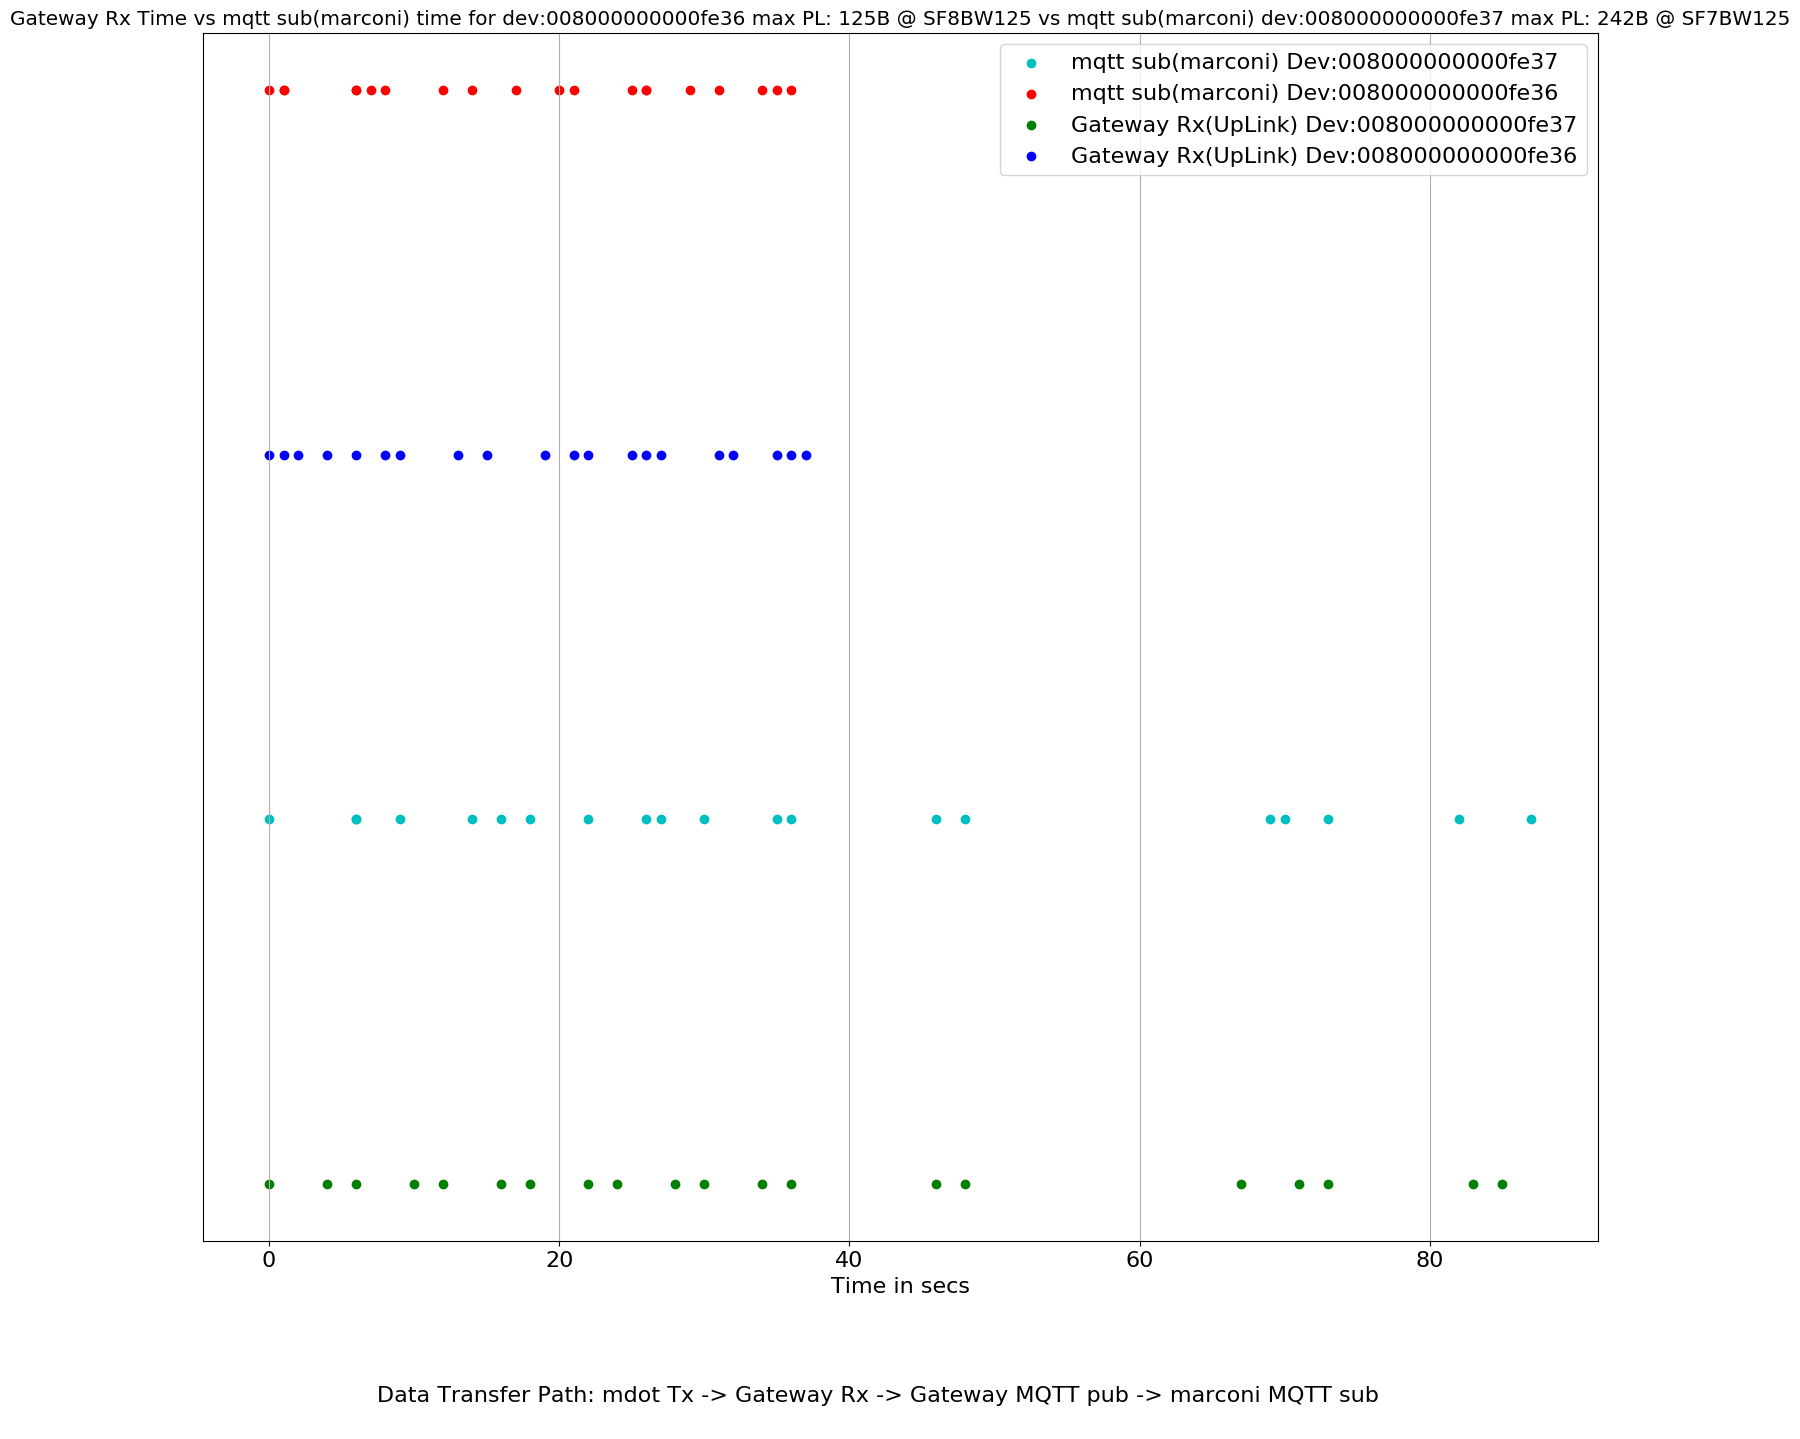

In [6]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import re
import time, datetime
import dateutil.parser as dp

"""
File check
"""
# def checkFile(path):
#     if os.path.exists(path):
#         print("Found file:%s"%path)
#         return True
#     else:
#         print("File not found\n")
#         return False

"""
Plot the gw rx timestamps and toa timestamps
"""
def plot_predicted(path,t_sub1,t_sub2):
	# print("t_sub1:\n{}".format(t_sub1))
	# print("t_sub2:\n{}".format(t_sub2))
	#devEUIs = ['00-80-00-00-00-00-fe-37','00-80-00-00-04-00-98-02']
	devEUIs = ['00-80-00-00-00-00-fe-37','00-80-00-00-00-00-fe-36']

	# Gateway RX
	dev1,dev2 = parserFunct(path[0])
	# mqtt sub Toa time in msg
	toa_dev1,toa_dev2 = parserFunctToa(path[1],devEUIs)

	# print("dev1:\n{}".format(dev1))
	# print("dev2:\n{}".format(dev2))

	# if not toa_dev1 or not toa_dev2 or not dev1 or not dev2:
	# 	return

	if not dev1 or not dev2:
		return

	'''
	============= commenting for time being ===============
	tSil1 = []
	tSil2 = []

	dc = 0.01
	constant = (1/dc) -1

	itr = 0

	for toa in toa_dev1:
		toa_sec = float(float(toa)/1000)
		temp = toa_sec*constant
		tSil1.append(temp)

	for toa in toa_dev2:
		toa_sec = float(float(toa)/1000)
		temp = toa_sec*constant
		tSil2.append(temp)
	'''

	d_time1 = []
	d_time2 = []

	# for dup_time1 in dev1:
	# 	a = time.strptime(dup_time1, "%H:%M:%S:%f")
	# 	d_time1.append(datetime.timedelta(hours=a.tm_hour, minutes=a.tm_min, seconds=a.tm_sec).seconds)
	#
	# for dup_time2 in dev2:
	# 	a = time.strptime(dup_time2, "%H:%M:%S:%f")
	# 	d_time2.append(datetime.timedelta(hours=a.tm_hour, minutes=a.tm_min, seconds=a.tm_sec).seconds)

	for dup_time1 in dev1:
		d_time1.append(int(dup_time1))

	for dup_time2 in dev2:
		d_time2.append(int(dup_time2))


	print("Time_dup1:{}\n".format(d_time1))
	print("Time_dup2:{}\n".format(d_time2))

	# save mqtt gateway rx time in epoch format
	prog_time1 = []
	#itr1 = d_time1[0]
	prog_time2 = []
	#itr2 = d_time2[0]

	# this to convert the duplicate flag: NO packet timestamps to plot grap in progressive manner
	for itr1 in range(len(d_time1)):
		prog_time1.append(d_time1[itr1])
		if itr1 == 0:
			val1 = d_time1[0]
		prog_time1[itr1] -= val1
        # if itr1 == 0:
        #     prog_time.append(0)
        # else:
        #     prog_time.append(d_time[itr1] - d_time[itr1 -1])

	print("Time_Prog1:{}\n".format(prog_time1))

	for itr2 in range(len(d_time2)):
		prog_time2.append(d_time2[itr2])
		if itr2 == 0:
			val = d_time2[0]
		prog_time2[itr2] -= val
        # if itr1 == 0:
        #     prog_time.append(0)
        # else:
        #     prog_time.append(d_time[itr1] - d_time[itr1 -1])
	print("Time_Prog2:{}\n".format(prog_time2))

	time_list1 = []

	'''
	for itr2 in range(len(tSil1)):
		if itr2 == 0:
			time_list1.append(0)
		else:
			time_list1.append(time_list1[itr2-1] + tSil1[itr2])

	time_list2 = []

	for itr2 in range(len(tSil2)):
		if itr2 == 0:
			time_list2.append(0)
		else:
			time_list2.append(time_list2[itr2-1] + tSil2[itr2])

	tSil1 = np.array(tSil1)
	tSil2 = np.array(tSil2)

	time_list1 = np.array(time_list1[:20])
	time_list2 = np.array(time_list2[:20])

	print("The tSil1 in secs:\n{}".format(tSil1))
	print("The tSil2 in secs:\n{}".format(tSil2))
	'''

	prog_time1 = np.array(prog_time1[:20])
	prog_time2 = np.array(prog_time2[:20])

	y_axis1 = np.array([1 for i in range(len(prog_time1))])
	y_axis2 = np.array([3 for i in range(len(prog_time2))])

	#print("len(prog_time1),len(prog_time1),len(y_axis1):",len(prog_time1),len(prog_time2),len(y_axis1),len(y_axis2))

    # plt.figure()
    # plt.plot(tSil, y_axis, color='g',linestyle='None', markersize = 10.0)
    # plt.plot(time_list, y_axis, color='g',linestyle='None', markersize = 10.0)
    # plt.scatter(time_list,y_axis, label='Gateway Rx', color='g')
	plt.rcParams.update({'font.size': 16})
	plt.scatter(prog_time1[:20],y_axis1, label='Gateway Rx(UpLink) Dev:008000000000fe37', color='g')
	#plt.scatter(prog_time2[:20],y_axis2, label='Gateway Rx(UpLink) Dev:0080000004009802', color='b')
	plt.scatter(prog_time2[:20],y_axis2, label='Gateway Rx(UpLink) Dev:008000000000fe36', color='b')
	plt.xlabel('Time in secs')

def fileExists(file):
    if os.path.exists(file):
        print("file:%s found\n"%file)
        return 1
    else:
        print("File:%s not found\n"%file)
        return -1


def parserFunct(file):
	regex2 = r'(.*)Device ID:(.*)'
	regex3 = r'(.*)Msg Time: (.*)'
	dev2 = []
	dev1 = []

	val1 = []
	val2 = []
	itr1 = 0
	itr2 = 0

	if fileExists(file) != -1:
		with open(file,'r') as file:
			for line in file:
				if "00-80-00-00-00-00-fe-37" in line:
					obj = re.search(regex3,line,re.M|re.I)
					#print(obj);
					res = obj.group(2);
					# print("res.split()[0]:{}".format(res.split()[0]))
					tp = dp.parse(res.split()[0])
					t_sec = tp.strftime('%s')
					dev1.append(t_sec)
					itr1 += 1
				elif "00-80-00-00-00-00-fe-36" in line:
					obj = re.search(regex3,line,re.M|re.I)
					#print(obj);
					res = obj.group(2);
					# print("res.split()[0]:{}".format(res))
					tp = dp.parse(res.split()[0])
					t_sec = tp.strftime('%s')
					dev2.append(t_sec)
					itr2 += 1
		return dev1,dev2
	else:
		return False

'''
parse the gateway rx time of lora packet from dot from lora-network-server.log file

def parserFunct(file):
	regex2 = r'(.*) Duplicate:(.*)'
	regex3 = r'(.*)|INFO|(.*)'
	dev2 = []
	dev1 = []

	val1 = []
	val2 = []
	itr1 = 0
	itr2 = 0

	if fileExists(file) != -1:
		with open(file,'r') as file:
			for line in file:
				if "00-80-00-00-00-00-fe-37" in line and "Duplicate" in line:
					obj = re.search(regex2,line,re.M|re.I)
					res = obj.group(2)
					#print("res1:{}".format(res))
					val1.append(res.strip())
					if val1[itr1] == 'no':
						obj = re.search(regex3,line,re.M|re.I)
						res = obj.group(1)
						#print("Time:{}\n".format(res.split('|INFO')[0]))
						dev1.append(res.split('|INFO')[0])
						itr1 += 1
				elif "00-80-00-00-00-00-fe-36" in line and "Duplicate" in line:
				#elif "00-80-00-00-04-00-98-02" in line and "Duplicate" in line:
					obj = re.search(regex2,line,re.M|re.I)
					res = obj.group(2)
					#print("res2:{}".format(res))
					val2.append(res.strip())
					if val2[itr2] == 'no':
						obj = re.search(regex3,line,re.M|re.I)
						res = obj.group(1)
						#print("Time2=====:{}\n".format(res.split('|INFO')))
						dev2.append(res.split('|INFO')[0])
						itr2 += 1
		return dev1,dev2
	else:
		return False
'''

'''
# this is for the toa item in the marconi log file
'''
def parserFunctToa(file,devList):

	regex_dev_toa = r'(.*)TOA:(.*)'
	#regex_dev_msg_rx = r'(.*)Msg Time:(.*)'
	#regex2 = r'(.*) Duplicate:(.*)'
	#regex3 = r'(.*)|INFO|(.*)'
	dev1_val = []
	dev2_val = []
	#time_val = []
	itr = 0;
	if fileExists(file) != -1:
		with open(file,'r') as file:
			for line in file:
				if devList[0] in line and "TOA" in line:
					obj = re.search(regex_dev_msg_rx,line,re.M|re.I)
					res = obj.group(2)
					dev1_val.append(int(res.split()[0]))
				elif devList[1] in line and "TOA" in line:
					#elif devList[1] in line and "TOA" in line:
					#obj = re.search(regex_dev_toa,line,re.M|re.I)
					obj = re.search(regex_dev_msg_rx,line,re.M|re.I)
					res = obj.group(2)
					dev2_val.append(int(res.split()[0]))
		return (dev1_val,dev2_val)
	else:
		return False

'''
To plot the mqtt_sub timestamps
'''
def creatTimeList(file,devEUIs):
    regex_dev_sub_time = r'(.*)Msg Time:(.*)'

    timeList_dev1 = []
    timeList_dev2 = []

    itr = 0
    itr2 = 0
    val = 0

    with open(file,'r') as fp:
        for line in fp:
        	if devEUIs[0] in line:
        		obj = re.search(regex_dev_sub_time,line,re.M|re.I)
        		res = obj.group(2)

        		timeList_dev1.append(int(res.split()[0]))
		        if itr == 0:
		            val = timeList_dev1[0]
		        #print("dev:{}".format(res.split()[0]))
		        timeList_dev1[itr] -= val
		        itr += 1

	        elif devEUIs[1] in line:
	        	obj = re.search(regex_dev_sub_time,line,re.M|re.I)
	        	res = obj.group(2)
	        	timeList_dev2.append(int(res.split()[0]))
	        	if itr2 == 0:
	        		val = timeList_dev2[0]
	        	timeList_dev2[itr2] -= val
	        	itr2 += 1

    #print("Time List1:{}".format(timeList_dev1))
    #print("Time List2:{}".format(timeList_dev2))
    return timeList_dev1,timeList_dev2

def plot(filePath,devEUIs):
	retFlag = 0
	#retFlag += fileExists(filePath[0])
	retFlag += fileExists(filePath[1])

	if retFlag < 1:
		return -1

	#timeList1 = creatTimeList(filePath[0])
	timeList_dev1,timeList_dev2 = creatTimeList(filePath[1],devEUIs)

	#timeList1 = np.array(timeList1)
	timeList_dev1 = np.array(timeList_dev1)
	timeList_dev2 = np.array(timeList_dev2)

	y_axis1 = np.array([2 for i in range(len(timeList_dev1))])
	y_axis2 = np.array([4 for i in range(len(timeList_dev2))])

	fig = plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')
	#fig = plt.figure()
	#fig.canvas.draw()
	plt.plot(timeList_dev1[:20], y_axis1[:20], color='r', linestyle='None', markersize = 10.0)
	plt.scatter(timeList_dev1[:20],y_axis1[:20],label = 'mqtt sub(marconi) Dev:008000000000fe37',color='c')
	plt.plot(timeList_dev2[:20], y_axis2[:20], color='b', linestyle='None', markersize = 10.0)
	#plt.scatter(timeList_dev2[:20],y_axis2[:20], label = 'mqtt sub(marconi) Dev:0080000004009802',color='r')
	plt.scatter(timeList_dev2[:20],y_axis2[:20], label = 'mqtt sub(marconi) Dev:008000000000fe36',color='r')
	#text_str = 'Data Transfer Path: marconi MQTT pub -> Gateway MQTT sub -> Gateway Tx -> mdot Rx\nData Transfer Path: mdot Tx -> Gateway Rx -> Gateway MQTT pub -> marconi MQTT sub\n'
	plt.rcParams.update({'font.size': 12})
	plt.title('Gateway Rx Time vs mqtt sub(marconi) time for dev:008000000000fe36 max PL: 125B @ SF8BW125 vs mqtt sub(marconi) dev:008000000000fe37 max PL: 242B @ SF7BW125')
	#plt.title('Gateway Rx Time vs mqtt sub(marconi) time for dev:008000000000fe37 max PL: 11B @ SF10BW125 vs mqtt sub(marconi) dev:008000000000fe36 max PL: 242B @ SF8BW500')
	plt.rcParams.update({'font.size': 16})
	text_str = 'Data Transfer Path: mdot Tx -> Gateway Rx -> Gateway MQTT pub -> marconi MQTT sub\n'
	fig.text(.5,0.01,text_str,wrap=True,ha='center')

	return timeList_dev1,timeList_dev2


if __name__ == '__main__':

	#filePath = ['/home/adigal/Desktop/new_dr2_dr3.log','/home/adigal/Desktop/lora_marconi_dr2_dr3.txt']

	#filePath = ['/home/iot/Desktop/testJuypter/lora-network-server.log','/home/iot/Desktop/testJuypter/marconi_0325.txt']
	filePath = ['/home/iot/Desktop/gw_tmst_log.txt','/home/iot/Desktop/log_mqtt_marconi_0413.txt']

	#ret1,ret2 = plot(filePath)
    # if ret == -1:
    #     print("Error")

	#path = r"/home/hadigal/Desktop/test_lora_logs.log"
	#plt.title('Gateway Rx Time vs actual time to mqtt sub tx pkt of size 11B@SF7BW125 from mdot vs mqtt pub pkt of 10B size to mdot')
	#dev EUI logged to afile on marconi with mqtt sub time stamps
	#devEUIs = ['00-80-00-00-00-00-fe-37','00-80-00-00-04-00-98-02']
	devEUIs = ['00-80-00-00-00-00-fe-37','00-80-00-00-00-00-fe-36']

	#filePath = ['/home/adigal/Downloads/log_mqttPub.txt','/home/adigal/Downloads/log_mqtt_marconi_sub.txt']
	#plt.title('Gateway Rx Time vs mqtt sub(marconi) for dev:008000000400982b max PL: 113B @ SF8BW125 vs mqtt sub(marconi) dev:008000000000fe37 max PL: 234B @ SF7BW125')
	#plt.ion()
	ret1,ret2 = plot(filePath,devEUIs) # mqtt sub/pub plot
	plot_predicted(filePath,ret1,ret2)
	plt.gca().legend(loc='best')
	plt.gca().yaxis.set_major_locator (plt.NullLocator())
	plt.grid(True)
	plt.show()
